In [3]:
from gwosc.datasets import find_datasets
from gwosc.locate import get_event_urls
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
import pylab
import numpy as np
import pandas as pd
import pycbc

In [83]:
events_available = find_datasets(type='events')
print(events_available)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 'GW190521-v2', 'GW190521-v3', 'GW190521_074359-v1', 'GW190527_092055-v1', 'GW190602_175927-v1', 'GW1

In [84]:
urls = get_event_urls('GW190915_235702-v1')
gps = event_gps('GW190915_235702-v1')
print(gps)

1252627040.7


In [87]:
!wget https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5

--2021-04-20 22:25:35--  https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5/ [following]
--2021-04-20 22:25:37--  https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5/
Reusing existing connection to www.gw-openscience.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1035842 (1012K) [application/x-hdf]
Saving to: ‘H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5’

H-H1_GWOSC_4KHZ_R1- 100%[===================>]   1012K   553KB/s    in 1.8s    

2021-04-20 22:25:39 (553 KB/s) - ‘H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5’ saved [1035842/1035842]



In [4]:
segment = (int(gps) - 6, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True, cache=True)

Fetched 1 URLs from www.gw-openscience.org for [1252627034 .. 1252627042))
Reading data... [Done]


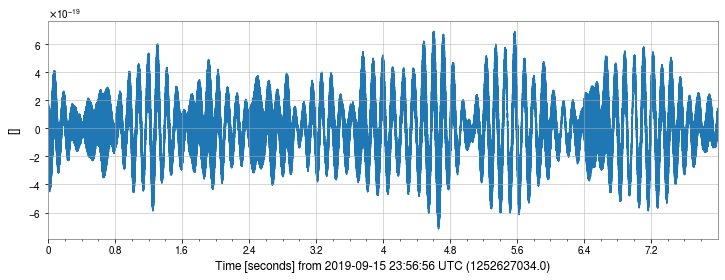

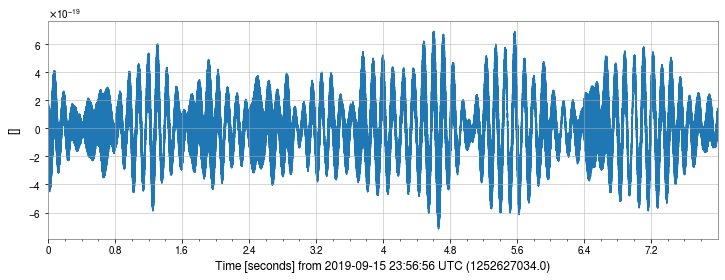

In [104]:
hdata.plot()

In [5]:
urls

['https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252627025-32.hdf5',
 'https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/H-H1_GWOSC_4KHZ_R1-1252624993-4096.hdf5',
 'https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/L-L1_GWOSC_4KHZ_R1-1252627025-32.hdf5',
 'https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/L-L1_GWOSC_4KHZ_R1-1252624993-4096.hdf5',
 'https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/V-V1_GWOSC_4KHZ_R1-1252627025-32.hdf5',
 'https://www.gw-openscience.org/eventapi/json/GWTC-2/GW190915_235702/v1/V-V1_GWOSC_4KHZ_R1-1252624993-4096.hdf5']

In [6]:
hq2 = hdata.q_transform( tres = 1/1024,logf=True,fres=100, frange=(20,1000),qrange=(3,8),whiten=False, outseg=(gps-0.2,gps+0.1) )
#plot = hq2.plot()
#ax = plot.gca()
#ax.set_yscale('log')
#ax.set_ylim(16,512)

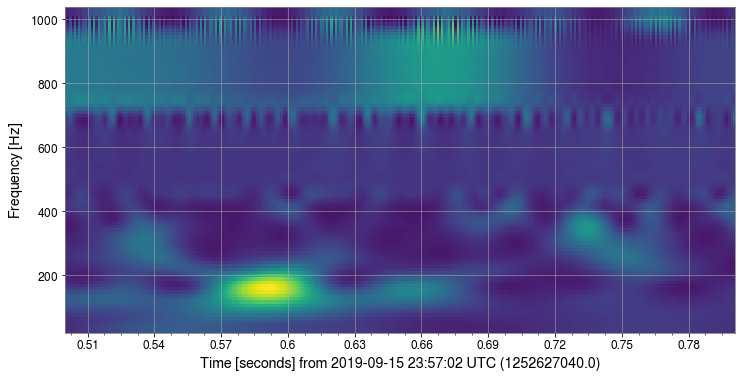

In [8]:
hq2.plot()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


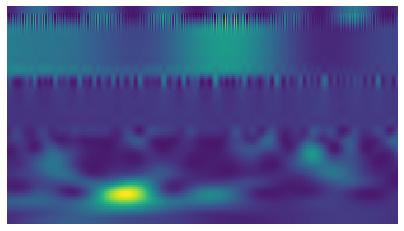

In [88]:
%matplotlib inline
fig=hq2.pcolormesh(cmap="viridis",figsize=[7,4])
pylab.xlim(gps-0.2,gps+0.1)
pylab.yscale("log",basey=2)
#pylab.colorbar()
#pylab.clim(0,20)
pylab.axis("off")
pylab.margins(0,0)
pylab.gca().xaxis.set_major_locator(pylab.NullLocator())
pylab.gca().yaxis.set_major_locator(pylab.NullLocator())
#pylab.savefig(odir+ "/H1/"+str(data['event_tag'][i])+'.png',bbox_inches="tight",pad_inches = 0)
pylab.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/gwpy/plot/axes.py:282: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return super().pcolormesh(*args, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


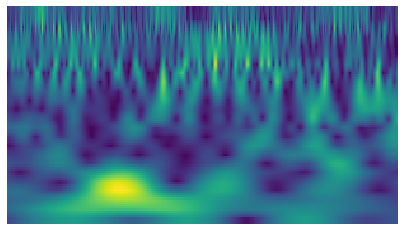

In [138]:
%matplotlib inline
hdata_1=pycbc.types.TimeSeries(hdata.value,delta_t=hdata.dt.value,epoch = hdata.times.value[0],dtype='float64',copy=True)
times_h1, freqs_h1,power_h1 = (hdata_1.whiten(8,2)* 1E-21).qtransform(1/1024,logfsteps=100,qrange=(4,8),frange = (15,1000))
## extra thing added to adjust the clim in presence of noise!
st,end = np.where(times_h1 <= gps-0.2)[0][-1],np.where(times_h1 >= gps+0.1)[0][0]

pylab.figure(figsize=[7,4])
pylab.pcolormesh(times_h1[st:end],freqs_h1,power_h1[:,st:end]**0.5/np.max(power_h1[:,st:end]**0.5),cmap="viridis")
pylab.xlim(gps-0.2,gps+0.1)
pylab.yscale("log",basey=2)
#ylab.colorbar()
# pylab.clim(0,20)
pylab.axis("off")
pylab.margins(0,0)
pylab.gca().xaxis.set_major_locator(pylab.NullLocator())
pylab.gca().yaxis.set_major_locator(pylab.NullLocator())
#pylab.savefig(odir+ "/H1/"+str(data['event_tag'][i])+'.png',bbox_inches="tight",pad_inches = 0)
pylab.show()

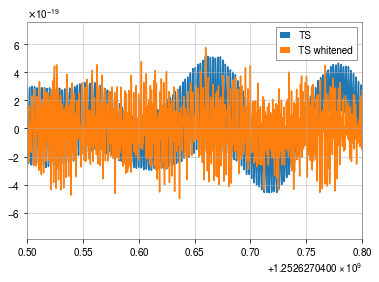

In [139]:
hdata_whitened = hdata_1.whiten(8,2)* 1E-21
pylab.plot(hdata_1.sample_times,hdata_1,label='TS')
pylab.plot(hdata_whitened.sample_times,hdata_whitened,label='TS whitened')
pylab.xlim(gps-0.2,gps+0.1)
pylab.legend()
pylab.show()

# using pycbc

In [4]:
from pycbc import catalog

### List the mergers in the catalog
for merger_name in catalog.Catalog(source='gwtc-2'):
    print(merger_name)

GW190408_181802-v1
GW190412-v3
GW190413_052954-v1
GW190413_134308-v1
GW190421_213856-v1
GW190424_180648-v1
GW190425-v2
GW190426_152155-v1
GW190503_185404-v1
GW190512_180714-v1
GW190513_205428-v1
GW190514_065416-v1
GW190517_055101-v1
GW190519_153544-v1
GW190521-v3
GW190521_074359-v1
GW190527_092055-v1
GW190602_175927-v1
GW190620_030421-v1
GW190630_185205-v1
GW190701_203306-v1
GW190706_222641-v1
GW190707_093326-v1
GW190708_232457-v1
GW190719_215514-v1
GW190720_000836-v1
GW190727_060333-v1
GW190728_064510-v1
GW190731_140936-v1
GW190803_022701-v1
GW190814-v2
GW190828_063405-v1
GW190828_065509-v1
GW190909_114149-v1
GW190910_112807-v1
GW190915_235702-v1
GW190924_021846-v1
GW190929_012149-v1
GW190930_133541-v1


In [5]:
m = catalog.Merger('GW190924_021846-v1',source='gwtc-2')

In [17]:
m.common_name

'GW190924_021846'

In [3]:
from ligo.gracedb.rest import GraceDb
import pandas as pd
sg = GraceDb(cred='/tmp/x509up_p1598228.fileTMu8zk.1')

In [4]:
id = 'S190424ao'
sg.files(id, "bayestar.fits.gz")

HTTPError: <Response [404]>

In [ ]:
gwtc2_events = pd.read_csv('../../data/O3a_events/gwtc2_events.csv')
mergers_gwtc2 = gwtc2_events['name']

for i,merger in enumerate(mergers_gwtc2):
    trange = str(gwtc2_events['GPS'][i]-0.5) +'..' +str(gwtc2_events['GPS'][i]+0.5)
    for s in sg.superevents(query= trange ,columns=['superevent_id','preferred_event']):
        sup_id = s['superevent_id']
        gid = s['preferred_event']
        print(i,merger , sup_id,gid)
        if sup_id is not None:
            gwtc2_events['graceid'][i] = str(sup_id)

In [82]:
superevent_iterator = sg.superevents('is_exposed: True')
superevent_ids = [superevent['superevent_id'] for superevent in superevent_iterator]

In [2]:
event_iterator = sg.events('far < 1e-10')
graceids = [event['graceid'] for event in event_iterator]

In [18]:
df=pd.read_csv('event-superevent.csv',header=None)


In [21]:
np.where(df[0]==m.common_name)[0][0]

36